# Handling Radio Interferometer Baseline Visibilities using pyuvdata

The github for pyuvdata is located at https://github.com/HERA-Team/pyuvdata.

Dependencies required for this tutorial:
* python 2.7
* numpy
* matplotlib
* pyuvdata

You will also need the HERA miriad observation file:

**hera_testfile** which is located in the /pyuvdata/uvdata/data directory. This test observation file contains the xx polarization visibilities for the baselines of antennae 9_10, 9_20, and 10_20.

## Importing dependent functions

In [5]:
import numpy as n # import numpy, this gives us access to numerical and statistical functions
import matplotlib.pyplot as plt # import matplotlib, which gives us the ability to plot
import uvdata # import the pyuvdata function for handling miriad files (PAPER,HERA)

## Loading data

In [6]:
uv = uvdata.miriad.Miriad() # Initializes a miriad class
uv.read_miriad('/location_of_your_pyuvdata/pyuvdata/uvdata/data/hera_testfile') # Reads the data into the uv container

Altitude is not present in file and latitude and longitude values do not match values for PAPER in known telescopes. Using values from known telescopes.


## Finding the data

Say for example we want to look at the visibility for the HERA baseline of antenna 9 and 20.
To do that we can use a combination of an array and a function associated with the uv class. Those are
**baseline_array** and **antnums_to_baseline**. What we want to do is find where in the **data_array** array
the 9_20 baseline time samples exist, the positions of these time samples (over frequency) are encoded in the **baseline_array**. To do this we can use python's indexing as shown in the code snippet below.

***Note*** - The structure of data_array is:

(baseline time samples , 1 , frequency channels , polarizations [xx,yy,xy,yx] )

The structure of baseline_array is:

(baseline numbers corresponding to location in data_array,1)

antnums_to_baseline( ) returns the baseline number for the i,j antenna numbers

In [21]:
baseline_index = uv.antnums_to_baseline(9,20) == uv.baseline_array
Visibility9_20 = uv.data_array[baseline_index,0,:,0] #    This array has dimensions of 
                                                     #  (time samples) x (frequency channels)
print Visibility9_20.shape # Print the shape of the array

(56, 4)


## Plotting the amplitude and phase of the visibility

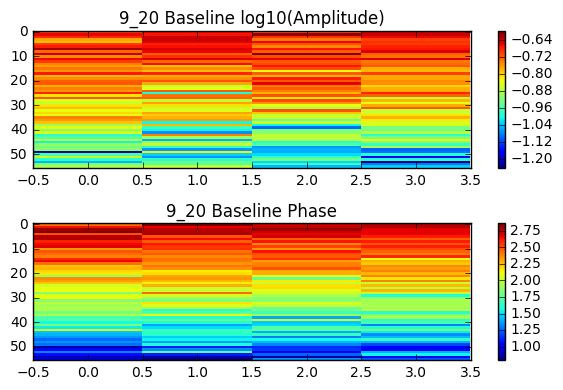

In [17]:
plt.figure()
plt.subplot(211)
plt.imshow(n.log10(n.abs(Visibility9_20)),interpolation='none',aspect='auto') # Plot the log of the visibility amplitude
plt.title('9_20 Baseline log10(Amplitude)')
plt.colorbar()

plt.subplot(212)
plt.imshow(n.angle(Visibility9_20),interpolation='none',aspect='auto') # Plot the phase of the visibility
plt.title('9_20 Baseline Phase')
plt.colorbar()
plt.tight_layout()
plt.show()